In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
dir1 = '/Users/harshmahadik/Downloads/SEM VII/DL/Dataset/Rice_Image_Dataset'
# Detect classes
rice = [class_name for class_name in os.listdir(dir1) if class_name]
rice.remove('Rice_Citation_Request.txt')
rice.remove('.DS_Store')
print(rice)

['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']


In [5]:
rice_data = []  # Initialize an empty list for storing image paths and labels

# Iterate through each class in the detection
for class_name in rice:
    class_path = os.path.join(dir1, class_name)  # Create the path for the class
    files = os.listdir(class_path)  # List all files in the class folder
    
    # Loop through all files and add their paths and class labels to the image_data list
    for file in files:
        file_path = os.path.join(class_path, file)  # Create the full file path
        rice_data.append((file_path, class_name))  # Append tuple to the list

# Convert the list to a pandas DataFrame
rice_df = pd.DataFrame(rice_data, columns=['path', 'label'])

# Shuffle the DataFrame rows for randomness
rice_df = rice_df.sample(frac=1).reset_index(drop=True)

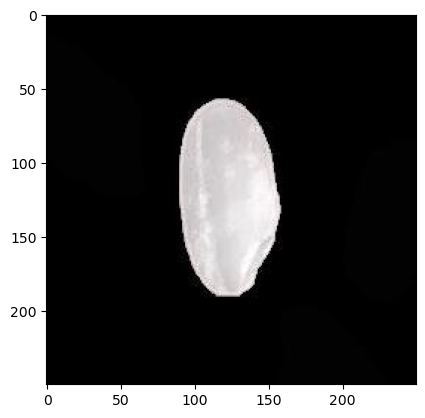

In [6]:
img = cv2.imread(rice_df.iloc[100]['path'])
plt.imshow(img)

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [18]:
ricepath = '/Users/fariddamania/Downloads/SEM VII/DL/Dataset/Rice_Image_Dataset'

In [20]:
# Data Augmentation and Data Split (train, validation, test)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


In [22]:
# Load Data
train_generator = train_datagen.flow_from_directory(
    ricepath,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    ricepath,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    ricepath,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Found 75000 images belonging to 5 classes.


In [14]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [23]:
# Build the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 505s 269ms/step - accuracy: 0.8884 - loss: 0.2967 - val_accuracy: 0.9722 - val_loss: 0.0806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2024-08-18 11:05:21.100079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-08-18 11:05:21.112004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 517s 276ms/step - accuracy: 0.9580 - loss: 0.1236 - val_accuracy: 0.9509 - val_loss: 0.1378
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2024-08-18 11:13:58.576090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-18 11:13:58.580047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 488s 260ms/step - accuracy: 0.9679 - loss: 0.0943 - val_accuracy: 0.9797 - val_loss: 0.0569


In [27]:
# Evaluate the Model on Test Data
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc}")


2344/2344 ━━━━━━━━━━━━━━━━━━━━ 157s 67ms/step - accuracy: 0.8717 - loss: 0.3867
Test Accuracy: 0.9400666952133179


In [32]:
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

     Arborio       1.00      0.77      0.87     15000
     Basmati       0.96      1.00      0.98     15000
      Ipsala       0.88      1.00      0.94     15000
     Jasmine       0.89      0.95      0.91     15000
   Karacadag       1.00      0.99      1.00     15000

    accuracy                           0.94     75000
   macro avg       0.94      0.94      0.94     75000
weighted avg       0.94      0.94      0.94     75000

